<a href="https://colab.research.google.com/github/ReemAlbluwi/Machine-Learning---T5/blob/main/Linear_Regression%D9%80SalaryDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression


## 1. Import laibrary

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


## 2. Load the salary data

In [3]:
data = pd.read_csv('Salary Data.csv')

## 3.Extract the feature and target variables


In [5]:
print(data.columns)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [8]:
print(data.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


**Cleaning Data**

In [14]:
# لمعرفه البيانات المفقوده
print(data.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [32]:
print(data.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [19]:
# فمت بفصل الاعمده الرقميه والنصيه
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

print("Numeric Columns:")
print(numeric_cols)

print("\nNon-Numeric Columns:")
print(non_numeric_cols)

Numeric Columns:
Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

Non-Numeric Columns:
Index(['Gender', 'Education Level', 'Job Title'], dtype='object')


In [20]:
# ملئ الاعمده البيانات المفقوده ب mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [21]:
# x => سنوات الخبرة
# Y => الراتب
X = data[['Years of Experience']].values  # Feature: Years of Experience
y = data['Salary'].values  # Target: Salary

## 4. Split the data into training/testing sets

In [22]:
#قمت بتقسيم البيانات لمجموعتين
#Train => 80%
#Test => 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## 5. Create linear regression object

In [12]:
regr = LinearRegression()

## 6. Train the model using the training sets


In [23]:
#مرحلة التدريب
regr.fit(X_train, y_train)

LinearRegression()

In [26]:
#توقع القيم الجديده
y_pred = regr.predict(X_test)

In [28]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [6913.6390684]


In [29]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 207136952.87


In [30]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.89


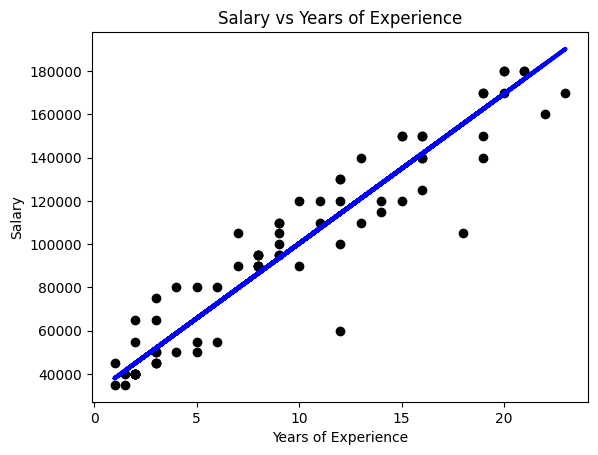

In [31]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.show()

In [35]:
coefficients = regr.coef_
intercept = regr.intercept_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# قمت بانشاء df
#لعرض نتائج رقميه
results = pd.DataFrame({
    'Metric': ['Coefficient', 'Intercept', 'Mean Squared Error', 'R2 Score'],
    'Value': [coefficients[0], intercept, mse, r2]
})

# طباعه ناتج ال df
print(results)

               Metric         Value
0         Coefficient  6.913639e+03
1           Intercept  3.114271e+04
2  Mean Squared Error  2.071370e+08
3            R2 Score  8.926069e-01


### Summary of Results

- **Coefficient**: 6913
  - Indicates an increase in salary by approximately 6913 for each additional year of experience.
- **Intercept**: 31142
  - The base salary at zero years of experience.

- **R2 Score**: 0.89
  - Indicates that the model explains about 89% of the variance in salary.

**Evaluation**: The model is generally good with a high R2 score, but it could be improved by reducing the error (MSE).
